# Lucy in the sky with diamonds 

## Imports

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.Cleaning_functions as fn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error


## Some info:

**Carat**: Diamond **carat** weight measures how much a diamond weighs. All else being equal, diamond price increases with diamond **carat** weight because larger diamonds are rarer and more desirable. However, two diamonds of equal carat weight can have very different values (and prices) depending on three other factors of the diamond 4Cs: **Color**, **Clarity**, and **Cut**.
   
 **Color**: D-to-Z diamond color-grading system measures the degree of colorlessness by comparing a stone. 
   
 **Cut**: Diamond’s cut grade is really about how well a diamond’s facets interact with light.
 
 **Clarity**: 
     + Flawless (FL) No inclusions and no blemishes visible under 10x magnification
     + Internally Flawless (IF) No inclusions visible under 10x magnification
     + Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
     + Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
     + Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
     + Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance
     
**x**: length in mm

**y**: width in mm

**z**: depth in mm

**depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**: width of top of diamond relative to widest point (43--95)

*https://4cs.gia.edu/en-us/4cs-diamond-quality/*

## Explore the data

In [84]:
train = pd.read_csv('./INPUT/diamonds_train.csv') 
test = pd.read_csv('./INPUT/diamonds_test.csv')

In [85]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [86]:
print(train.shape)
train.dtypes

(40345, 11)


Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [87]:
train.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345,40345,40345,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16090,8499,9751,NaN,NaN,NaN,NaN,NaN,NaN
mean,20172.000000,0.795652,NaN,NaN,NaN,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,11646.742642,0.470806,NaN,NaN,NaN,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20172.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,30258.000000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000


In [13]:
train.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [14]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

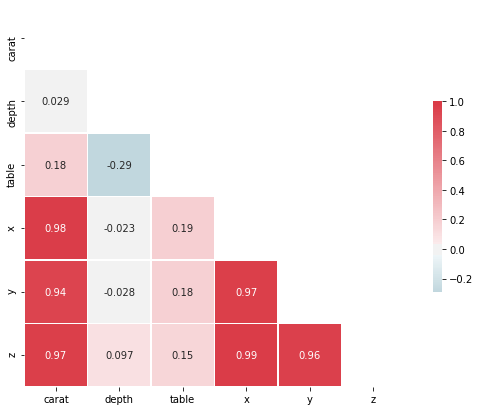

In [16]:
#Create the correlation matrix
correlation_matrix = train.drop(columns=['Unnamed: 0', 'price'], axis=1).corr()
#A mask to hide repeated data on top of the diagonal
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Draw the heatmap:
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

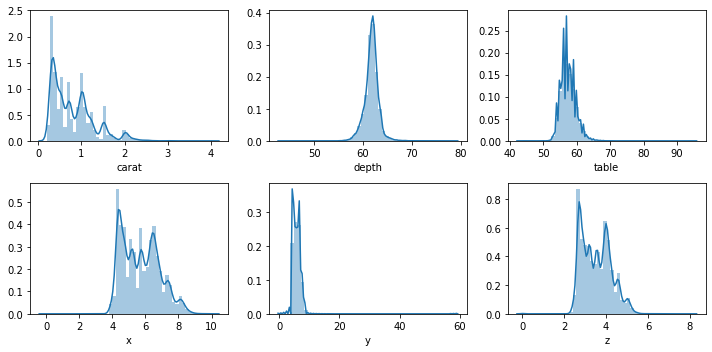

In [17]:
f, ax = plt.subplots(2,3, figsize=(10,5))
for i, e in enumerate(train.drop(columns=['Unnamed: 0','cut', 'color', 'clarity', 'price'], axis=1)):
    sns.distplot(train[e], ax = ax[(0 if i<3 else 1),(i if i<3 else i-3)])
plt.tight_layout()

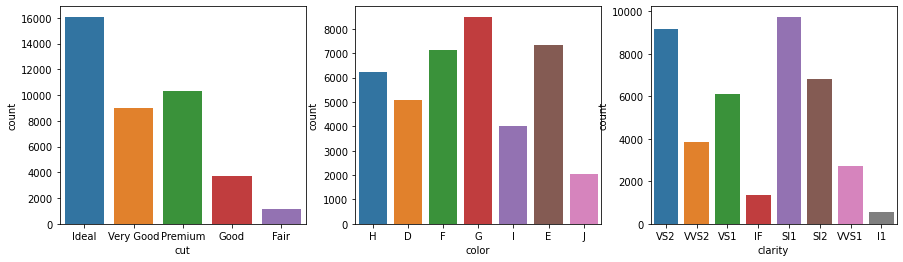

In [88]:
f, ax = plt.subplots(1,3, figsize = (15,4))
sns.countplot(train['cut'], ax = ax[0])
sns.countplot(train['color'], ax = ax[1])
sns.countplot(train['clarity'], ax = ax[2])

## Data Engineering

Converting object features into ordered numericals:

In [148]:
clarity = ('IF', 'VVS2','VS1','VS2','SI1','SI2','I1' )
color = ('J', 'I', 'H', 'G', 'F', 'E', 'D')
cut = ('Premium', 'Ideal', 'Very Good', 'Good','Fair')
categories = fn.categorize([train.cut, train.color, train.clarity], [cut, color, clarity])

In [149]:
train_clean = pd.concat([train, categories], axis=1, sort=False )

In [150]:
X_clean = train.drop(['price','Unnamed: 0', 'cut', 'color', 'clarity'], axis= 1) 
y = train.price

In [151]:
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

X = tr.fit_transform(X_clean)
X = pd.DataFrame(X,columns=X_clean.columns)
X

,carat,depth,table,x,y,z
0,0.434196,0.432866,-0.101593,0.442732,0.416557,0.494214
1,-0.354075,0.510631,-0.211194,-0.458357,-0.439140,-0.407858
2,-0.480348,-0.232661,0.145352,-0.466094,-0.477083,-0.499155
3,-0.413508,-0.165980,-0.074842,-0.508809,-0.509525,-0.526648
4,0.341883,0.612559,-0.108906,0.375320,0.377473,0.461168
...,...,...,...,...,...,...
40340,0.466318,-0.092042,0.460868,0.451092,0.420573,0.425807
40341,-0.411500,-0.359211,-0.290518,-0.455604,-0.425979,-0.477705
40342,-0.349765,0.230365,-0.803203,-0.258393,-0.247926,-0.226332
40343,0.162778,-0.539839,0.726112,0.237750,0.258298,0.177754


In [153]:
from sklearn.feature_selection import f_regression
X_new = f_regression(X, y, center=True)

In [155]:
pd.DataFrame(X_new)

,0,1,2,3,4,5
0,97246.661093,1.116269,4.740076e+02,61404.065622,61382.890149,57879.602382
1,0.000000,0.290730,1.722706e-104,0.000000,0.000000,0.000000


### Models

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [106]:
models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(alpha=1, tol=0.001, solver='auto', random_state=0),
    "Lasso" : Lasso(alpha=1, max_iter=1000, tol=0.0001),
    "ElasticNet" : ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, tol=0.0001, random_state=0),
    "BayesianRidge": BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)

Training model: LinearRegression
Training model: Ridge
Training model: Lasso
Training model: ElasticNet
Training model: BayesianRidge


In [107]:
for name, model in models.items():
    print(f"---------[{name}]---------:")
    y_pred = model.predict(X_test)
    results = pd.DataFrame({
    "GT":y_test,
    "pred":y_pred,
    "diff":y_pred-y_test
    })
    print("MSE = ",round(mean_squared_error(y_test,y_pred),5))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    #display(results)

---------[LinearRegression]---------:
MSE =  4313021.61639
RMSE =  2076.7815523993463
---------[Ridge]---------:
MSE =  4314047.08791
RMSE =  2077.02842732339
---------[Lasso]---------:
MSE =  4322335.73129
RMSE =  2079.02278277371
---------[ElasticNet]---------:
MSE =  7951009.05882
RMSE =  2819.753368437964
---------[BayesianRidge]---------:
MSE =  4313108.07933
RMSE =  2076.8023688654957


In [ ]:
 parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

## Training with all the data:

In [135]:
mod = LinearRegression()
mod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fixing test data:

In [144]:
clarity = ('IF', 'VVS2','VS1','VS2','SI1','SI2','I1' )
color = ('J', 'I', 'H', 'G', 'F', 'E', 'D')
cut = ('Premium', 'Ideal', 'Very Good', 'Good','Fair')
categories = fn.categorize([test.cut, test.color, test.clarity], [cut, color, clarity])
test_clean = pd.concat([test, categories], axis=1, sort=False )
X_testclean = test.drop(['Unnamed: 0', 'cut', 'color', 'clarity','x','y','z'], axis= 1) 
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

X_testdata = tr.fit_transform(X_testclean)
X_testdata = pd.DataFrame(X_testdata,columns=X_testclean.columns)


### Predicting

In [139]:
y_pred = mod.predict(X_test)

### Preparing csv

In [143]:
result = pd.DataFrame({'id':X_test.index, 'price':y_pred})
result

,id,price
0,0,1321.740238
1,1,-883.202205
2,2,9084.152422
3,3,-986.690060
4,4,7346.946748
...,...,...
13444,13444,6452.079154
13445,13445,-289.073900
13446,13446,8510.932633
13447,13447,8178.872136


In [146]:
result.to_csv('./OUTPUT/submission.csv')